# Exploration and classification of medical text data

Useful resources:
* See [here](https://www.kaggle.com/paultimothymooney/medical-speech-transcription-and-intent) for details on data and Kaggle competition.

* See [here](https://www.kaggle.com/paultimothymooney/medical-speech-transcription-and-intent/kernels) for inspired kernel.

* Inspired by [this blogpost](https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63) on natural language processing

* [A comprehensive guide to text classification](https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/)



In [234]:
# load basic jupyter notebook libraries and namespace
% pylab inline 
import pandas as pd # data manipulation
import nltk # natural language processing toolkit

pd.set_option('display.max_colwidth', -1) # fixes column width issue
plt.rcParams.update({'font.size': 14}) # customize plots

# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer


Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text', 'unique']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/m.irvine/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# load data

df = pd.read_csv('../data/overview-of-recordings.csv')

In [380]:
print(len(df.index))

6661


In [4]:
df[['phrase','prompt']].iloc[np.random.randint(0, len(df), 10)]

,phrase,prompt
1197,When I tried to be warm and wear more clothes I found that I was still cold,Feeling cold
4808,My heart is pumping fast and I'm having a hard time to breath.,Hard to breath
4911,There are lots of hairs on my pillow in the morning.,Hair falling out
1588,I noticed an important decrease in my vision when I try to look at things up close.,Blurry vision
109,I feel lightheaded,Feeling dizzy
4298,i feel pain in my stomach,Stomach ache
2440,I can't turn my neck to the left without feeling a stabbing pain,Neck pain
1802,I have the impression of having no strength in my body,Body feels weak
2417,My knee is hurting so badly.,Joint pain
460,It hurts when I raise my arm up,Shoulder pain


## Check to see if any phrases are duplicated

In [385]:
df.drop_duplicates(subset='phrase',inplace=True)
df = df.reset_index()

## Count of examples for each condition

In [386]:
counts = df['prompt'].value_counts()

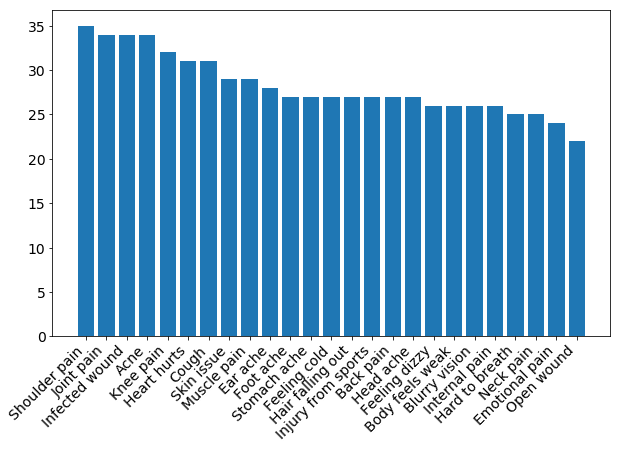

In [391]:
plt.figure(figsize=(10,6));
plt.bar(counts.index,counts.values);
plt.xticks(rotation=45,ha='right');

## Sentence tagging

In [388]:
sentence = df.loc[np.random.randint(0,len(df)),'phrase']
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)

In [389]:
print(sentence)

My chest hurts when I go to take a breath


In [390]:
print(tagged)

[('My', 'PRP$'), ('chest', 'JJS'), ('hurts', 'NNS'), ('when', 'WRB'), ('I', 'PRP'), ('go', 'VBP'), ('to', 'TO'), ('take', 'VB'), ('a', 'DT'), ('breath', 'NN')]


# Create word cloud

In [392]:
from wordcloud import WordCloud

In [393]:
# Generate a word cloud image
text = ' '.join(df['phrase'].values)
word_cloud = WordCloud(width=600,height=400,
                       max_words=150, background_color="white",
                       collocations=False).generate(text)

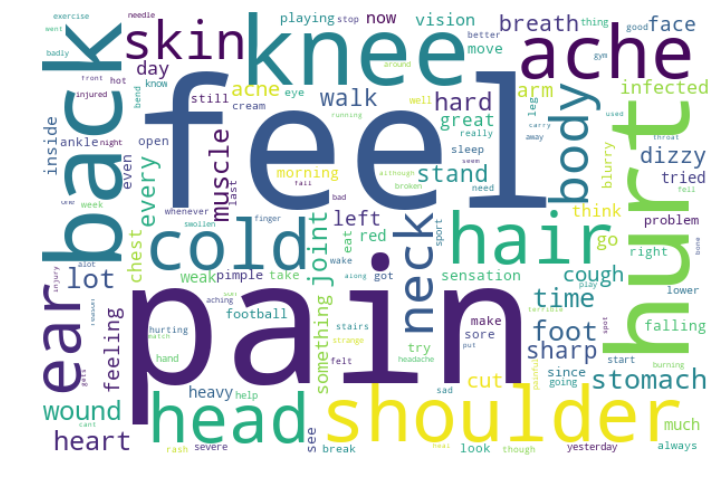

In [394]:
plt.figure(figsize=(12,10));
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis('off');

## Create class dependent worcloud

In [395]:
def create_word_cloud_from_prompt(df,prompt='Feeling cold'):
    '''Create a word cloud from a prompt
    
    '''
    text = df[df['prompt'] == prompt]['phrase'].values
    text = ' '.join(text)
    word_cloud = WordCloud(width=600,height=400,
                       max_words=150, background_color="white",
                       collocations=False).generate(text)
    plt.figure(figsize=(12,10));
    plt.imshow(word_cloud, interpolation='bilinear');
    plt.axis('off');

In [396]:
print('List of prompts: ')
print(df['prompt'].unique())

List of prompts: 
['Emotional pain' 'Hair falling out' 'Heart hurts' 'Infected wound'
 'Foot ache' 'Shoulder pain' 'Injury from sports' 'Skin issue'
 'Stomach ache' 'Knee pain' 'Joint pain' 'Hard to breath' 'Head ache'
 'Body feels weak' 'Feeling dizzy' 'Back pain' 'Open wound' 'Internal pain'
 'Blurry vision' 'Acne' 'Muscle pain' 'Neck pain' 'Cough' 'Ear ache'
 'Feeling cold']


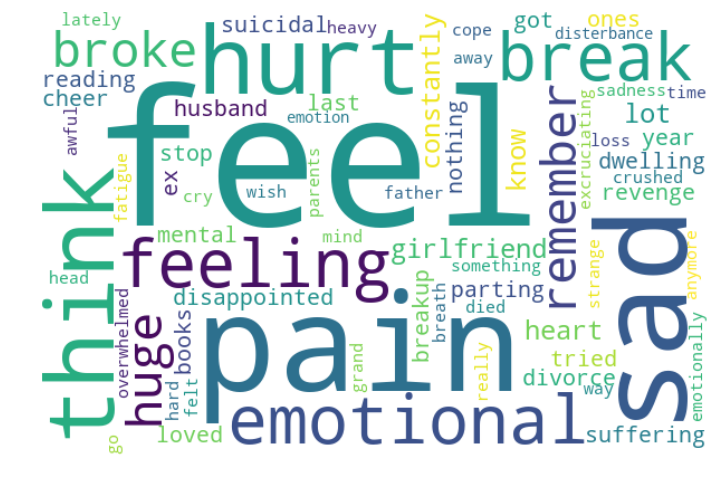

In [397]:
create_word_cloud_from_prompt(df,prompt='Emotional pain')

# Create simple bag of words model using count frequency

Adapted from this [introduction to NLP](https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63)

In [398]:
# Step 1. Load the data
documents = df['phrase'].values

In [399]:
# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()




In [400]:
# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents)



In [401]:
# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head(n=6)

,10,100,15,500m,70,abdomen,abdominal,able,about,above,...,yard,year,years,yellow,yesterday,you,young,your,zits,ït
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preparing data and running a bag-of-word model using sci-kit learn

Adapted from this [tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).

In [471]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



In [403]:
# create train data and target data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# generate data
target = le.fit_transform(df['prompt'].values)
data = df['phrase'].values

# print results
print('# of classes: {}'.format(len(le.classes_)))
print('Fitted classes:')
print(le.classes_)



# of classes: 25
Fitted classes:
['Acne' 'Back pain' 'Blurry vision' 'Body feels weak' 'Cough' 'Ear ache'
 'Emotional pain' 'Feeling cold' 'Feeling dizzy' 'Foot ache'
 'Hair falling out' 'Hard to breath' 'Head ache' 'Heart hurts'
 'Infected wound' 'Injury from sports' 'Internal pain' 'Joint pain'
 'Knee pain' 'Muscle pain' 'Neck pain' 'Open wound' 'Shoulder pain'
 'Skin issue' 'Stomach ache']


## create test/train split

Start by splitting data randomly between a `train` dataset that we will use for training models and a `test` dataset that we will use for validating model performance.

In [404]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.10, random_state=42)
print('Training data size: {}'.format(len(X_train)))
print('Testing data size: {}'.format(len(X_test)))

Training data size: 635
Testing data size: 71


In [405]:
def plot_comparison_classes(y_test,y_train):
    '''Plot comparison of occurances for each class between test and train
    '''
    plt.figure(figsize=(10,6));
    width = 0.35
    unique, counts = np.unique(y_test, return_counts=True)
    plt.bar(unique,counts/np.sum(counts),width,label='test');

    unique, counts = np.unique(y_train, return_counts=True)
    plt.bar(unique+width,counts/np.sum(counts),width,label='train');

    plt.xlabel('Class'); plt.ylabel('Occurance'); plt.legend();

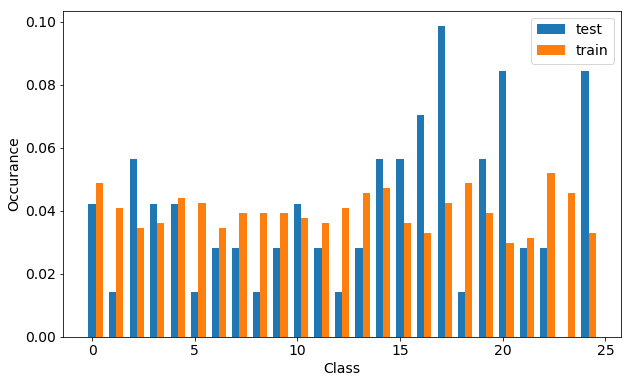

In [406]:
plot_comparison_classes(y_test,y_train)

### Balance occurance of each class

Class imbalance between the test and training dataset can become an issue, we can fix this by stratifying along each class.

In [407]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.10, stratify=target,random_state=42)
print('Training data size: {}'.format(len(X_train)))
print('Testing data size: {}'.format(len(X_test)))

Training data size: 635
Testing data size: 71


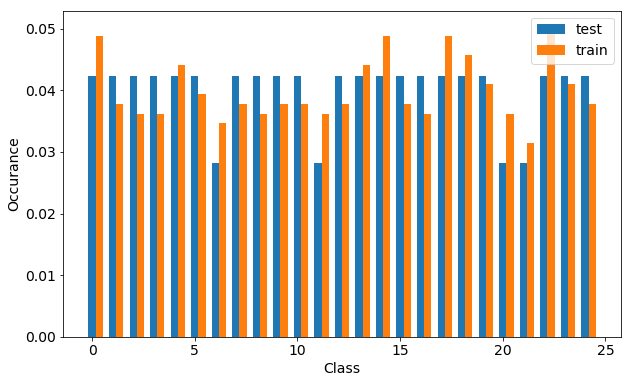

In [408]:
plot_comparison_classes(y_test,y_train)

## Create and fit classifier

In [485]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [486]:
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [487]:
predicted = text_clf.predict(X_test)
val_acc = np.mean(predicted == y_test) 
print('Validation accuracy: {:.2%}'.format(val_acc))

Validation accuracy: 59.15%


In [488]:
def print_resampled_accuracy(predicted,y,samples=1000):
    '''Bootstrap confidence intervals for test accuracy
    '''
    from sklearn.utils import resample
    acc = []
    for _ in range(samples):
        r_p, r_y = resample(predicted, y)
        acc.append(np.mean(r_p == r_y))

    lc,m,uc = np.percentile(acc,[2.5,50.,97.5]);
    print('Accuracy : {:.2%} ({:.2%} - {:.2%})'.format(m,lc,uc))

In [489]:

predicted = text_clf.predict(X_train)
print('Training : ')
print_resampled_accuracy(predicted,y_train)

predicted = text_clf.predict(X_test)
print('Validation : ')
print_resampled_accuracy(predicted,y_test)

Training : 
Accuracy : 92.28% (90.07% - 94.33%)
Validation : 
Accuracy : 59.15% (47.89% - 70.42%)


![img](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png)

In [492]:
from sklearn.metrics import classification_report
predicted = text_clf.predict(X_test)
print(classification_report(y_test, predicted, target_names=classes))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00         3
         Back pain       1.00      0.67      0.80         3
     Blurry vision       1.00      0.67      0.80         3
   Body feels weak       0.50      0.67      0.57         3
             Cough       0.67      0.67      0.67         3
          Ear ache       1.00      0.33      0.50         3
    Emotional pain       0.00      0.00      0.00         2
      Feeling cold       1.00      0.67      0.80         3
     Feeling dizzy       1.00      1.00      1.00         3
         Foot ache       1.00      0.33      0.50         3
  Hair falling out       1.00      1.00      1.00         3
    Hard to breath       0.00      0.00      0.00         2
         Head ache       0.67      0.67      0.67         3
       Heart hurts       0.40      0.67      0.50         3
    Infected wound       0.43      1.00      0.60         3
Injury from sports       0.00      0.00

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## check examples that are incorrect

In [477]:


def print_class_prediction(sentence,clf=text_clf):
    probs = clf.predict_proba([sentence]).flatten()

    classes = le.classes_
    x = np.arange(len(classes))

    plt.figure(figsize=(10,6));
    plt.grid(True,axis='y');
    plt.bar(x,probs);
    plt.xticks(x,classes,rotation=45,ha='right',fontsize=14);

    ind = np.argmax(probs)
    max_prob = probs[ind]
    max_class = classes[ind]
    plt.title('Predicted condition : {}, confidence {:.2%}'.format(max_class,max_prob),fontsize=14);


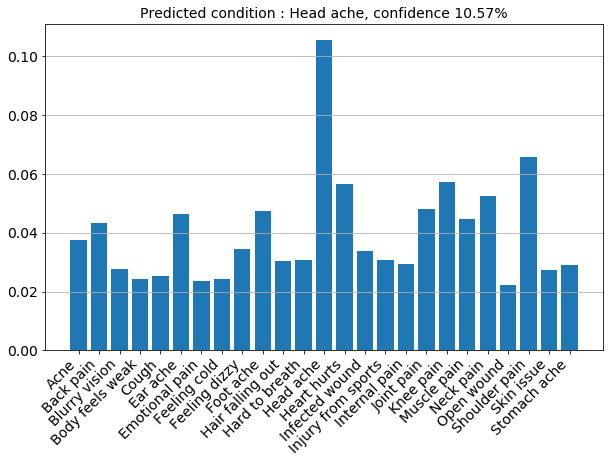

In [478]:
example_sentence = "It hurts when I turn my head"
print_class_prediction(example_sentence)

Sentence: 
The wound is still open
True label: Open wound


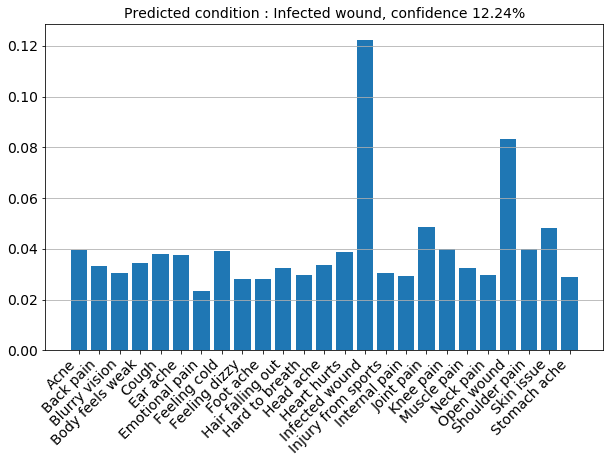

In [479]:
# get random incorrectly labelled sentence
incorrect_X = X_test[predicted != y_test]
incorrect_y = y_test[predicted != y_test]

ind = np.random.randint(len(incorrect_y))
incorrrectly_labeled_sentence = incorrect_X[ind]
true_class = le.inverse_transform(incorrect_y[ind])

print('Sentence: ')
print(incorrrectly_labeled_sentence)

print('True label: {}'.format(true_class))
print_class_prediction(incorrrectly_labeled_sentence)

## Incorporating in Lemmatization

In [417]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
 

In [493]:
wnl = WordNetLemmatizer()
sentence = "I have been feeling dizzy for many days."
lemma_sentence = ' '.join([wnl.lemmatize(wnl.lemmatize(t,'v'),'n') for t in word_tokenize(sentence)])

print('Original sentence:\n\t {}'.format(sentence))
print('Lemmatized sentence:\n\t {}'.format(lemma_sentence))

Original sentence:
	 I have been feeling dizzy for many days.
Lemmatized sentence:
	 I have be feel dizzy for many day .


In [494]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [wnl.lemmatize(wnl.lemmatize(t,'v'),'n') for t in word_tokenize(doc)]
text_lemma_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])


In [495]:
text_lemma_clf.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [496]:
predicted = text_lemma_clf.predict(X_test)
 
print_resampled_accuracy(predicted,y_test)

Accuracy : 61.97% (49.30% - 73.24%)


In [497]:
print(classification_report(y_test, predicted, target_names=classes))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00         3
         Back pain       1.00      0.67      0.80         3
     Blurry vision       1.00      0.67      0.80         3
   Body feels weak       1.00      0.67      0.80         3
             Cough       0.50      0.67      0.57         3
          Ear ache       1.00      1.00      1.00         3
    Emotional pain       0.00      0.00      0.00         2
      Feeling cold       1.00      0.67      0.80         3
     Feeling dizzy       1.00      1.00      1.00         3
         Foot ache       1.00      0.33      0.50         3
  Hair falling out       1.00      1.00      1.00         3
    Hard to breath       0.00      0.00      0.00         2
         Head ache       0.67      0.67      0.67         3
       Heart hurts       0.40      0.67      0.50         3
    Infected wound       0.60      1.00      0.75         3
Injury from sports       0.00      0.00

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The wound is still open


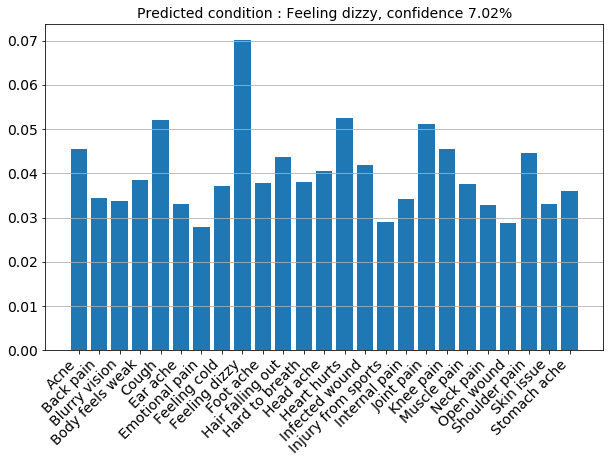

In [498]:
print(incorrrectly_labeled_sentence)
print_class_prediction(sentence,clf=text_lemma_clf)

## Random forest classifier

In [499]:
from sklearn.ensemble import RandomForestClassifier
text_rf_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=1000)),
])


In [500]:
text_rf_clf.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [501]:
print('Training data')
predicted = text_rf_clf.predict(X_train)
print_resampled_accuracy(predicted,y_train,samples=1000)

Training data
Accuracy : 99.84% (99.52% - 100.00%)


In [502]:
print('Test data')
predicted = text_rf_clf.predict(X_test)
print_resampled_accuracy(predicted,y_test,samples=1000)

Test data
Accuracy : 78.87% (69.01% - 87.32%)


In [503]:
print(classification_report(y_test, predicted, target_names=classes))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00         3
         Back pain       1.00      1.00      1.00         3
     Blurry vision       1.00      0.67      0.80         3
   Body feels weak       0.40      0.67      0.50         3
             Cough       0.67      0.67      0.67         3
          Ear ache       1.00      1.00      1.00         3
    Emotional pain       0.50      1.00      0.67         2
      Feeling cold       1.00      0.67      0.80         3
     Feeling dizzy       1.00      1.00      1.00         3
         Foot ache       1.00      1.00      1.00         3
  Hair falling out       0.75      1.00      0.86         3
    Hard to breath       0.00      0.00      0.00         2
         Head ache       0.60      1.00      0.75         3
       Heart hurts       1.00      1.00      1.00         3
    Infected wound       1.00      1.00      1.00         3
Injury from sports       0.50      0.33

## See prediction for random sentence

In [504]:
row = df.sample()
example_sentence = row['phrase'].values[0]
condition = row['prompt'].values[0]

I had a sharp pain in my stomach
True condition: Stomach ache


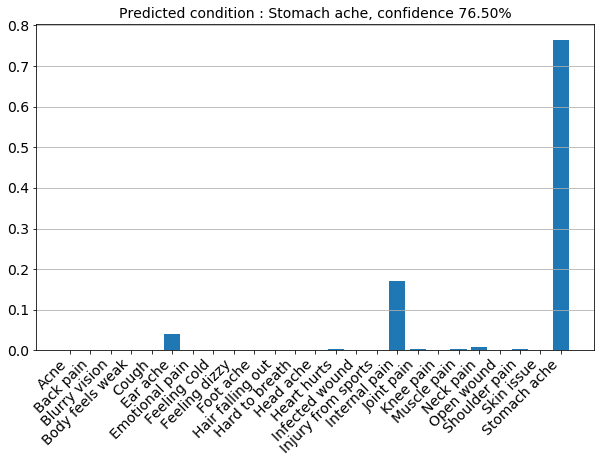

In [505]:

print(example_sentence)
print('True condition: {}'.format(condition))
print_class_prediction(example_sentence,clf=text_rf_clf)

## See prediction for incorrectly labelled sentences

Sentence: 
I have a problem in the expiration because i have abronchial asthma
True label: Hard to breath


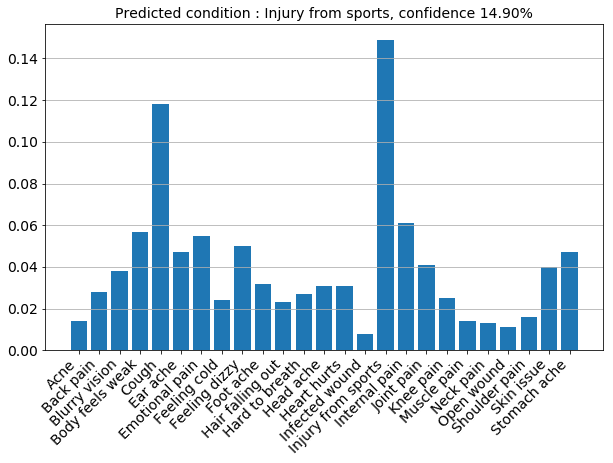

In [506]:
# get random incorrectly labelled sentence
incorrect_X = X_test[predicted != y_test]
incorrect_y = y_test[predicted != y_test]

ind = np.random.randint(0,len(incorrect_y))

incorrrectly_labeled_sentence = incorrect_X[ind]
true_class = le.inverse_transform(incorrect_y[ind])

print('Sentence: ')
print(incorrrectly_labeled_sentence)

print('True label: {}'.format(true_class))
print_class_prediction(incorrrectly_labeled_sentence,clf=text_rf_clf)

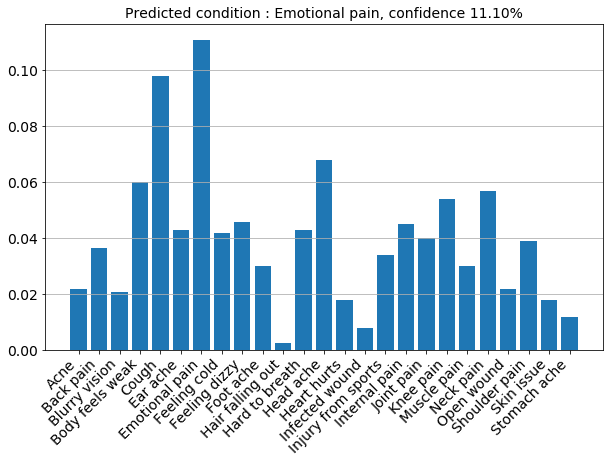

In [507]:
print_class_prediction("It hurts when I lie down. I can't sleep",clf=text_rf_clf)

# Unsupervised learning

## Topic modelling

Let's pretend we don't have the classes for our data. Can we still provide labels to each of symptom reports or find some way of clustering together? This type of approach is known as topic modelling and is an example of an unsupervised learning problem.

In [481]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {:d}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))



no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(data)
tf_feature_names = tf_vectorizer.get_feature_names()

n_components = 5

# Run NMF
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
print('NMF Topics\n----------')

display_topics(nmf, tfidf_feature_names, no_top_words)
print('\n\n\nLDA Topics\n----------')
display_topics(lda, tf_feature_names, no_top_words)

NMF Topics
----------
Topic 0:
pain stomach sharp shoulder neck joint knee muscle foot great
Topic 1:
feel like dizzy weak body stand heart chest time feels
Topic 2:
hurts heart head knee walk lot bend arm badly try
Topic 3:
hair falling lot combing shower coming lately time brush treatment
Topic 4:
cold ache ear feeling foot sleep cough night wake severe



LDA Topics
----------
Topic 0:
pain feel knee cold foot left walk lot joint breath
Topic 1:
ear face acne vision cough ache blurry pimples sleep just
Topic 2:
feel pain like hurts shoulder head stomach stand dizzy time
Topic 3:
infected cut wound inside neck red hand sore open looks
Topic 4:
hair body skin falling feels weak like morning feel lot


In [482]:
output = lda.transform(tfidf)

In [483]:
for topic in range(output.shape[1]):
    print('Topic {}:'.format(topic))
    inds = np.argsort(output[:,topic])[::-1]
    for ind in inds[:5]:
        print(data[ind])

Topic 0:
I have cut my finger because of playing football and I have to apply pain relief cream but it does not help
I hve cut my finger because of playing football and I  to apply pain relief cream but it does not help
There is a sharp pain in my bicep. I have tried to apply pain relief cream but it does not help.
I feel pain in my legs muscles after I ran yesterday, I took some pain killers but it doesn't help.
I had alot of exercise yesterday so i feel sharp muscle pains
Topic 1:
I have an ear ache that won't go away.  I don't have a cold or headache or any other symptoms.  Just an earache.
My face has broken out in painful red spots and lumps, that no matter how much I clean my face don't seem to be going away.
I started taking swimming lessons and I guess I swallowed too much water through my nose, because this sinusitis is killing me now.
My nose is congested all the time and there's this gluey secretion in my throat that makes it impossible for me to sleep. I often have to nap s

## Topic modelling for visualisation

## Dimensionality reduction / manifold learning